In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from os import listdir
from tensorflow.keras.preprocessing.image import load_img

In [2]:

plus_dir = 'C:\Dataset\+'
minus_dir = 'C:\Dataset\-'
times_dir = 'C:/Dataset/times'
plus_names = listdir(plus_dir)
minus_names = listdir(minus_dir)
times_names = listdir(times_dir)

In [3]:
plus_len = len([name for name in listdir(plus_dir)])
minus_len = len([name for name in listdir(minus_dir)])
times_len = len([name for name in listdir(times_dir)])

In [79]:
train_names = plus_names + minus_names + times_names
train_labels = []
for i in range(0, plus_len):
    train_labels.append('plus')
for i in range(plus_len, plus_len + minus_len):
    train_labels.append('minus')
for i in range(plus_len + minus_len, plus_len + minus_len + times_len):
    train_labels.append('times')
print(len(train_labels))

11434


In [96]:
X_train = ([])

for name in train_names:
    X_train.append(cv2.imread(name, 0))
    X_train[len(X_train) - 1] = np.reshape(X_train[len(X_train) - 1], (45, 45, 1))
    X_train[len(X_train) - 1] = X_train[len(X_train) - 1].astype('float32')
    X_train[len(X_train) - 1] /= 255
X_train = tf.convert_to_tensor(X_train)
print(X_train.shape)

(11434, 45, 45, 1)


In [85]:
for i in range(0, plus_len):
    train_names[i] = plus_dir + '/' + train_names[i]
for i in range(plus_len, plus_len + minus_len):
    train_names[i] = minus_dir + '/' + train_names[i]
for i in range(plus_len + minus_len, plus_len + minus_len + times_len):
    train_names[i] = times_dir + '/' + train_names[i]

C:\Dataset\+/exp12345.jpg


In [69]:
import cv2

def preprocessing(train_names):
    X_train = tf.zeros((plus_len + minus_len + times_len))
    for name in train_names:
        X_train.append(cv2.imread(name, 0))
        X_train[len(X_train) - 1] = np.reshape(X_train[len(X_train) - 1], (1, 45, 45, 1))
        X_train[len(X_train) - 1] = X_train[len(X_train) - 1].astype('float32')
        X_train[len(X_train) - 1] /= 255
    return X_train

In [68]:
X = preprocessing(train_names)
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

#model.fit(X, train_labels,
#         batch_size = 16,
#       epochs = 10
#         )

AttributeError: 'tuple' object has no attribute 'append'

In [6]:
# + = 0   - = 1   x = 2
train_df = pd.DataFrame({
    'id': train_names,
    'label': train_labels
})

train_df.head()

,id,label
0,C:\Dataset\+/exp12345.jpg,plus
1,C:\Dataset\+/exp12347.jpg,plus
2,C:\Dataset\+/exp12348.jpg,plus
3,C:\Dataset\+/exp12350.jpg,plus
4,C:\Dataset\+/exp12352.jpg,plus


In [16]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = (56, 56, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 54, 54, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 32)       

In [17]:
data_gen_with_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = data_gen_with_aug.flow_from_dataframe(
    train_df,
    x_col='id',
    y_col='label',
    class_mode = 'categorical',
    target_size = (56, 56),
    batch_size = 16
)

Found 11434 validated image filenames belonging to 3 classes.


In [18]:
import sys
from PIL import Image
sys.modules['Image'] = Image 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit_generator(
    train_generator,
    epochs = 10,
    shuffle = True,
    steps_per_epoch = 3)


  ...
    to  
  ['...']
Train for 3 steps
Epoch 1/10
1/3 [=========>....................] - ETA: 1s

UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node sequential_2/conv2d_6/Relu (defined at <ipython-input-18-c368785e533f>:9) ]] [Op:__inference_distributed_function_9264]

Function call stack:
distributed_function


In [ ]:
#model.save('C:/Model_Symbols')

uint8
(45, 45)


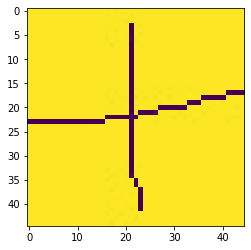

In [12]:

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
img = 'C:/Dataset/+/exp12345.jpg'
#img = 'Downloads/canvas-img (4).png'
image = image.imread(img)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [ ]:
test_df = pd.DataFrame({
       "id": img
}, index = [0])
test_df.head()

In [ ]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    x_col = 'id',
    y_col = None,
    class_mode = None,
    batch_size = 1,
    target_size = (45, 45),
    shuffle = False
)

In [ ]:
prediction = model.predict_generator(test_generator, steps=1)
print(prediction)

In [ ]:
ans = np.argmax(prediction, axis = -1)
if ans == 0:
    print('OK')

In [ ]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import cv2
# load image as pixel array
img = 'Downloads/canvas-img (4).png'
image = cv2.imread(img, -1)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()